In [1]:
import pandas as pd
import numpy as np

import utils

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)

# Kostic Colorectal Cancer

## GG97 OTU

In [2]:
task = 'Kostic Colorectal Cancer Healthy/Tumor GG97 OTU'
folder = 'kostic-tumor'

In [3]:
num_features = 3231
weights = (1, -1)

In [4]:
df1 = pd.read_csv('./'+folder+'/C4L1L4_kostic_20210215_00_11_54/best_test.csv', sep=';') # NoRel+NoCLR
df2 = pd.read_csv('./'+folder+'/2L6TF9_kostic_20210215_01_29_35/best_test.csv', sep=';') # Rel+NoCLR
df3 = pd.read_csv('./'+folder+'//FUIA7C_kostic_20210215_01_29_30/best_test.csv', sep=';') # NoRel+CLR

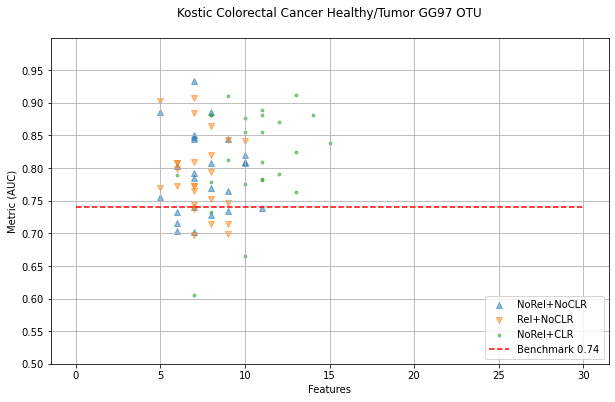

In [5]:
utils.plot(df1, df2, df3, 'num_genes', 'metric', num_features, weights, title=task, subtitle='', baseline=0.74, filename='./plots/kostic_tumor_gg97_otu.png', xmax=30, ylim=(0.5, 1))

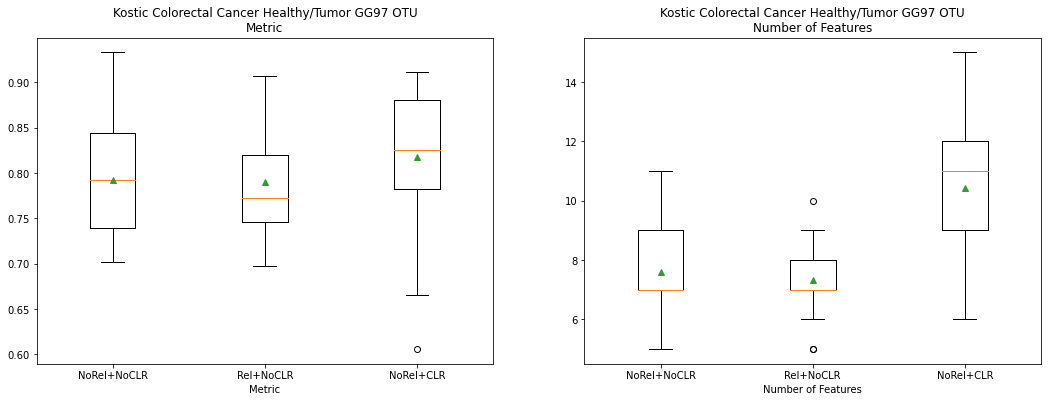

In [6]:
utils.boxplot(df1, df2, df3, num_features, weights, title=task, filename='./plots/kostic_tumor_boxplot_gg97_otu.png')

In [7]:
d = {
    'NoRel+NoCLR': utils.all(df1, num_features, weights).sort_values('metric', ascending=False),
    'Rel+NoCLR': utils.all(df2, num_features, weights).sort_values('metric', ascending=False),
    'NoRel+CLR': utils.all(df3, num_features, weights).sort_values('metric', ascending=False)
}

---

In [8]:
import sys 
sys.path.append('../src')

import dataset
import config
import run_best_features
from tasks import *

import ast

In [9]:
n = 100

In [10]:
# Experiment 1

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''

data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data1, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (172, 3231)


In [11]:
# Experiment 2

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_gg_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''

data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'Rel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data2, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (172, 3231)


In [12]:
# Experiment 3

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'

data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+CLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data3, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_gg_'+experiment+'.tsv', sep='\t')

Final dataset shape: (172, 3231)


In [13]:
d['NoRel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
31,21,7,0.848,0.846,"[264, 1319, 2073, 2095, 2200, 2559, 2861]",0.846,0.846,"[0.905, 0.905, 0.853, 0.867, 0.848, 0.915, 0.6...",0.860,0.696,0.976,0.052
18,13,8,0.886,0.884,"[62, 194, 264, 338, 2095, 2347, 2559, 3083]",0.884,0.884,"[0.849, 0.91, 0.773, 0.858, 0.893, 0.893, 0.90...",0.858,0.735,0.983,0.052
16,11,7,0.933,0.931,"[2, 1269, 1655, 2095, 2200, 2274, 2998]",0.931,0.931,"[0.867, 0.884, 0.836, 0.815, 0.798, 0.855, 0.9...",0.850,0.713,0.955,0.051
9,7,7,0.740,0.738,"[120, 1002, 2095, 2100, 2357, 2491, 3087]",0.738,0.738,"[0.865, 0.896, 0.824, 0.867, 0.907, 0.848, 0.9...",0.840,0.687,0.945,0.052
13,10,8,0.728,0.726,"[264, 1178, 1938, 2087, 2100, 2708, 2859, 3194]",0.726,0.726,"[0.856, 0.865, 0.856, 0.839, 0.739, 0.808, 0.8...",0.838,0.692,0.986,0.061


In [14]:
d['Rel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
10,5,10,0.841,0.838,"[194, 272, 731, 1319, 1642, 1945, 2095, 2200, ...",0.838,0.838,"[0.846, 0.715, 0.824, 0.941, 0.922, 0.884, 0.8...",0.863,0.715,0.983,0.058
30,21,7,0.772,0.770,"[194, 639, 1857, 2295, 2422, 2559, 2766]",0.770,0.770,"[0.862, 0.732, 0.791, 0.813, 0.811, 0.858, 0.8...",0.848,0.709,0.967,0.055
29,20,7,0.907,0.905,"[264, 500, 1319, 1968, 2428, 2559, 2766]",0.905,0.905,"[0.855, 0.888, 0.791, 0.843, 0.801, 0.73, 0.91...",0.846,0.631,0.964,0.064
0,0,7,0.737,0.735,"[194, 264, 972, 1330, 1654, 2357, 2859]",0.735,0.735,"[0.799, 0.799, 0.91, 0.91, 0.843, 0.799, 0.822...",0.841,0.680,0.950,0.053
15,9,7,0.697,0.695,"[194, 338, 1731, 2107, 2559, 2723, 3059]",0.695,0.695,"[0.806, 0.834, 0.796, 0.777, 0.817, 0.886, 0.7...",0.841,0.666,0.957,0.059


In [15]:
d['NoRel+CLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
41,24,11,0.881,0.878,"[89, 194, 639, 749, 840, 986, 1319, 1330, 2357...",0.878,0.878,"[0.855, 0.701, 0.83, 0.754, 0.763, 0.789, 0.94...",0.835,0.701,0.965,0.054
29,16,9,0.813,0.810,"[264, 379, 631, 1002, 1367, 2095, 2494, 2723, ...",0.810,0.810,"[0.773, 0.825, 0.735, 0.849, 0.839, 0.862, 0.8...",0.835,0.678,0.958,0.057
20,9,11,0.889,0.886,"[170, 194, 1269, 1319, 1592, 2357, 2430, 2491,...",0.886,0.886,"[0.903, 0.791, 0.777, 0.872, 0.808, 0.965, 0.8...",0.833,0.728,0.965,0.052
31,18,13,0.763,0.759,"[73, 194, 539, 798, 1319, 1436, 1731, 2095, 22...",0.759,0.759,"[0.798, 0.787, 0.917, 0.758, 0.829, 0.884, 0.6...",0.827,0.657,0.946,0.062
26,13,13,0.912,0.908,"[145, 194, 300, 871, 1192, 1385, 1665, 1863, 1...",0.908,0.908,"[0.815, 0.891, 0.881, 0.843, 0.785, 0.76, 0.80...",0.803,0.668,0.927,0.062


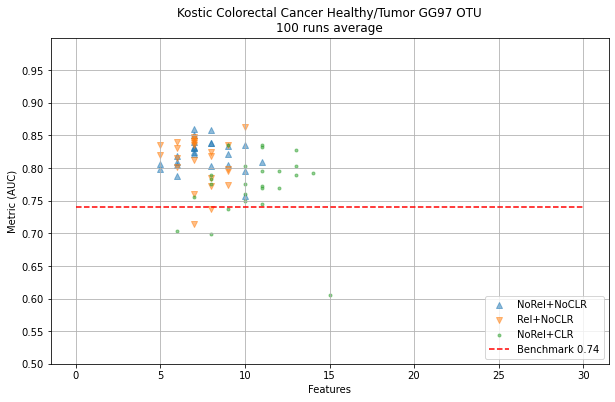

In [16]:
utils.plot(d['NoRel+NoCLR'], d['Rel+NoCLR'], d['NoRel+CLR'], 'num_genes', 'avg_n', num_features, weights, title=task, subtitle='100 runs average', baseline=0.74, filename='./plots/kostic_tumor_gg97_otu_avg_n.png', xmax=30, ylim=(0.5, 1))

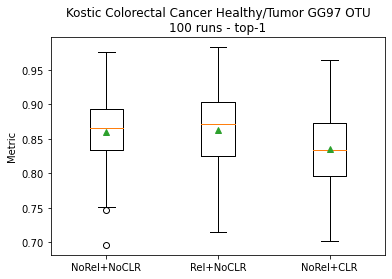

In [17]:
utils.boxplot_nruns_top1(d, title=task, subtitle='100 runs - top-1', filename='./plots/kostic_tumor_boxplot_nruns_top1_gg97_otu.png')

---

In [4]:
import pandas as pd
import numpy as np

import sys 
sys.path.append('../src')

import utils

import dataset
import config
import run_best_features
from tasks import *

import ast

In [5]:
folder = 'kostic-tumor'
top_n = 5
n = 100

stats = {
    'NoRel+NoCLR': pd.read_csv('./'+folder+'/stats_gg_NoRel+NoCLR.tsv', sep='\t'),
    'Rel+NoCLR': pd.read_csv('./'+folder+'/stats_gg_Rel+NoCLR.tsv', sep='\t'),
    'NoRel+CLR': pd.read_csv('./'+folder+'/stats_gg_NoRel+CLR.tsv', sep='\t'),
}

best_n = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

In [6]:
config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''
data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+NoCLR'], i)
    res = run_best_features.run(config, data1, top_n_features, n)
    best_n['NoRel+NoCLR'].append(np.round(np.mean(res), 3))

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_gg_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''
data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['Rel+NoCLR'], i)
    res = run_best_features.run(config, data2, top_n_features, n)
    best_n['Rel+NoCLR'].append(np.round(np.mean(res), 3))

config.DATA_PARAMS['task'] = cancer['kostic_healthy_tumor_gg_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'
data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+CLR'], i)
    res = run_best_features.run(config, data3, top_n_features, n)
    best_n['NoRel+CLR'].append(np.round(np.mean(res), 3))

Final dataset shape: (172, 3231)
Final dataset shape: (172, 3231)
Final dataset shape: (172, 3231)


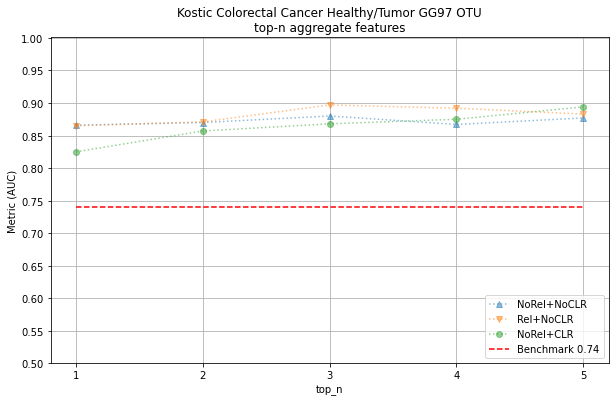

In [7]:
utils.plot_nruns_topn(best_n, title=task, subtitle='top-n aggregate features', baseline=0.74, filename='./plots/kostic_tumor_nruns_topn_gg97_otu.png', xmax=(top_n-1), ylim=(0.5, 1.001), top_n=top_n)

In [8]:
best_n

{'NoRel+NoCLR': [0.866, 0.87, 0.88, 0.867, 0.877],
 'Rel+NoCLR': [0.865, 0.871, 0.897, 0.892, 0.883],
 'NoRel+CLR': [0.825, 0.857, 0.868, 0.875, 0.894]}

---

In [52]:
import importlib
importlib.reload(run_best_features)
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\mikel\\Documents\\MScAI\\Sem4\\proposal-draft\\microbiome\\microbiome-analysis\\output\\utils.py'>

In [53]:
experiment = 'NoRel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)
_ = run_best_features.run(config, data1, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
        24210       0.0222    ['k__Bacteria; p__Spirochaetes; c__Spirochaetes; o__Spirochaetales; f__Spirochaetaceae; g__Treponema; s__socranskii']
        846141      0.0261    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__[Ruminococcus]; s__']
        766113      0.0278    []
       2614328      0.0344    ['k__Bacteria; p__Fusobacteria; c__Fusobacteria; o__Fusobacteriales; f__Fusobacteriaceae; g__Fusobacterium; s__']
       1076587      0.0521    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__Dorea; s__formicigenerans']
       1517779      0.0575    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Rikenellaceae; g__; s__']
       4093636      0.0581    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__Blautia; s__']
       4338624      0.0633    []
       1040889      0.0638    ['k__Bacteria; p__Firmicutes

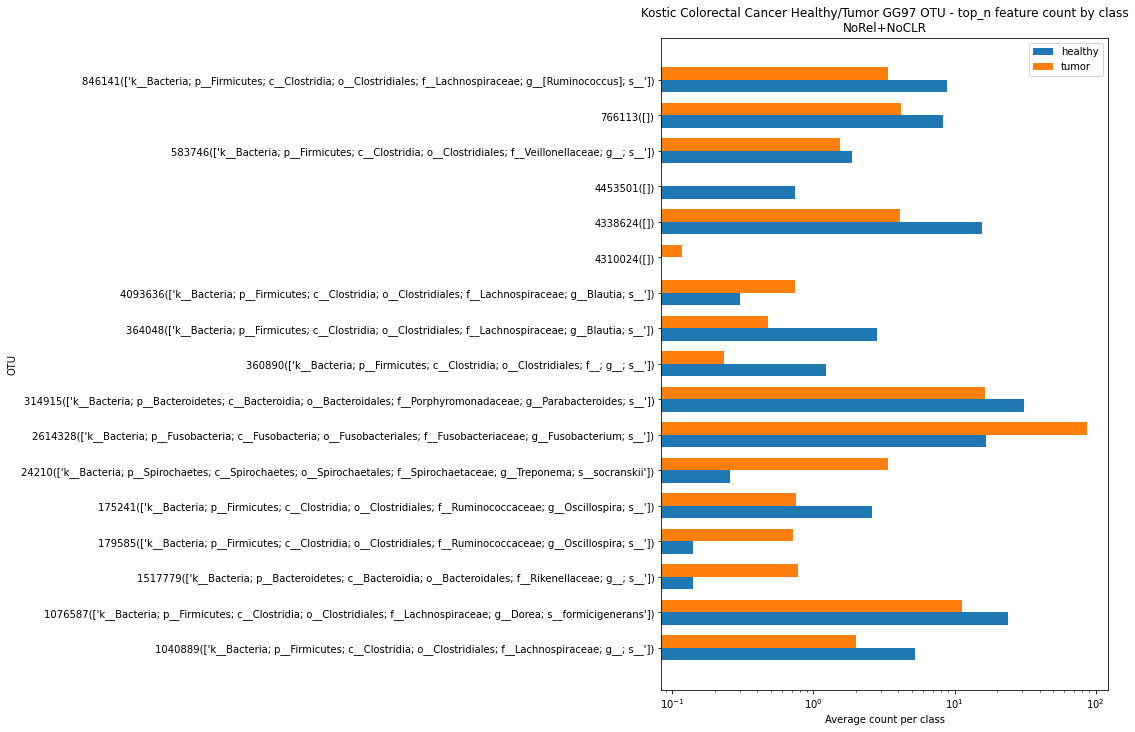

In [54]:
features = data1.features[top_n_features]
filename = f'./plots/kostic_tumor_features_by_class_{experiment}_gg97_otu.png'
utils.plot_features_per_class(data1, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('healthy', 'tumor'), figsize=(8,12), filename=filename)

In [55]:
experiment = 'Rel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

_ = run_best_features.run(config, data2, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
        195095      0.0074    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__Blautia; s__']
        348304      0.0211    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Bacteroidaceae; g__Bacteroides; s__']
        313086      0.0267    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__Dorea; s__']
        350091      0.0413    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Coriobacteriales; f__; g__; s__']
       4337970      0.0475    []
        553150      0.0534    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__; s__']
       4385326       0.06     []
        185420      0.0609    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Rikenellaceae; g__; s__']
       4394095      0.0688    []
       1517779      0.071     ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales;

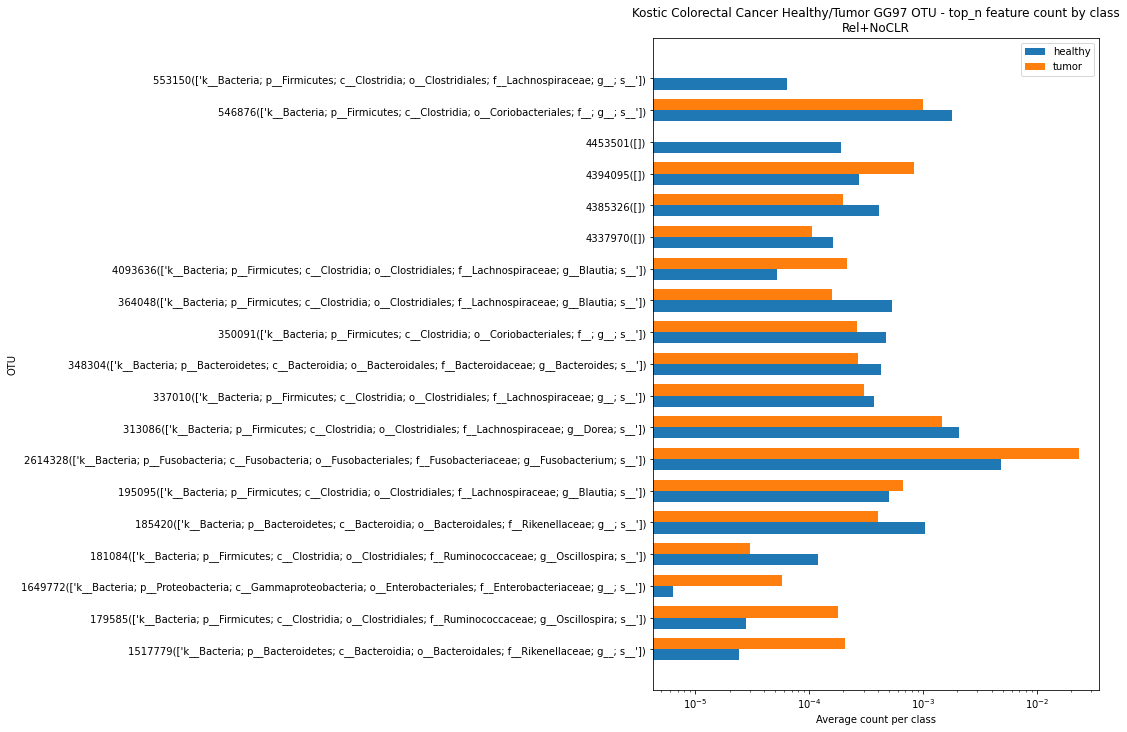

In [56]:
features = data2.features[top_n_features]
filename = f'./plots/kostic_tumor_features_by_class_{experiment}_gg97_otu.png'
utils.plot_features_per_class(data2, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('healthy', 'tumor'), figsize=(8,12), filename=filename)

In [57]:
experiment = 'NoRel+CLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

_ = run_best_features.run(config, data3, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
        953855      0.0226    ['k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Rikenellaceae; g__; s__']
        291348      0.0241    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Oscillospira; s__']
       2614328      0.0278    ['k__Bacteria; p__Fusobacteria; c__Fusobacteria; o__Fusobacteriales; f__Fusobacteriaceae; g__Fusobacterium; s__']
       4389125      0.0285    []
       4093636      0.0415    ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Lachnospiraceae; g__Blautia; s__']
       2706302      0.0454    ['k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Pasteurellales; f__Pasteurellaceae; g__Haemophilus; s__parainfluenzae']
        304777      0.047     ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Ruminococcaceae; g__Ruminococcus; s__']
        325419       0.05     ['k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostrid

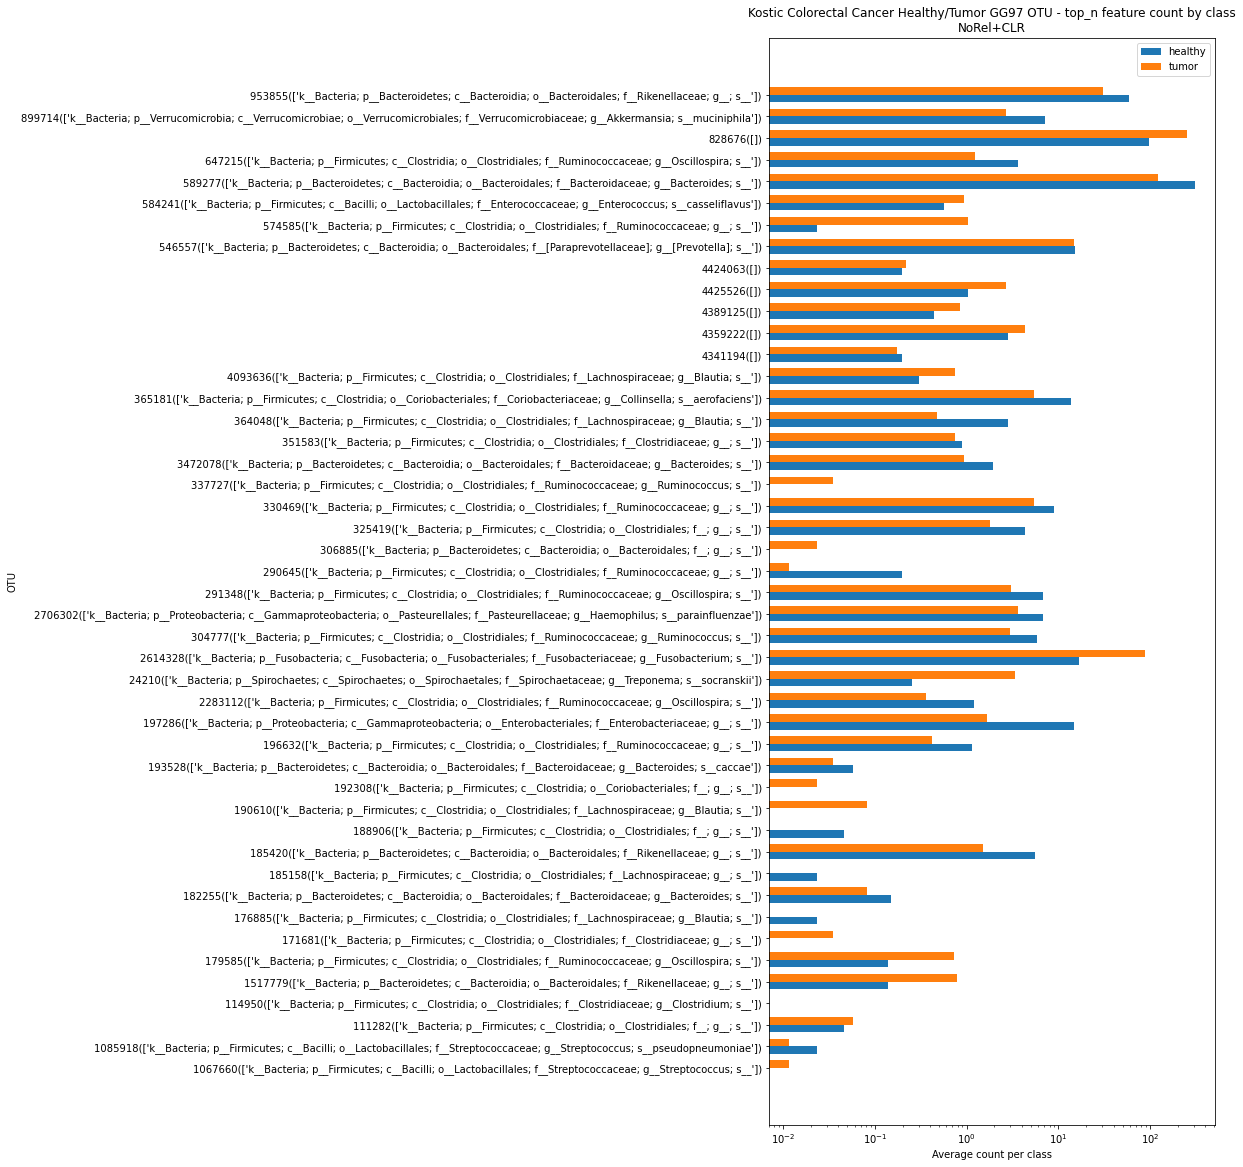

In [58]:
features = data3.features[top_n_features]
filename = f'./plots/kostic_tumor_features_by_class_{experiment}_gg97_otu.png'
utils.plot_features_per_class(data3, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('healthy', 'tumor'), figsize=(8,20), filename=filename)